# 任务6.2 构建并评价聚类模型

## 6.2.1 使用sklearn估计器构建聚类模型
聚类的输入是一组未被标记的样本，聚类根据数据自身的距离或相似度将他们划分为若干组，划分的原则是组内样本最小化而组间（外部）距离最大化，如图所示。


In [11]:
%%html
<img style="float: left;" src="./image/6-10-1.png" width=400 height=400>

In [14]:
%%html
<img style="float: left;" src="./image/6-10-2.png" width=600 height=400>

In [16]:
%%html
<img style="float: left;" src="./image/6-10-3.png" width=700 height=400>

In [17]:
%%html
<img style="float: left;" src="./image/6-10-4.png" width=700 height=400>

### 6-10 使用sklearn估计器构建K-Means聚类模型
组内距离最小化,组间(外部)距离最大化

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [29]:
iris = load_iris()
iris_data = iris['data'] ##提取数据集中的特征
iris_target = iris['target'] ## 提取数据集中的标签
iris_names = iris['feature_names'] ### 提取特征名
scale = MinMaxScaler().fit(iris_data)## 训练规则
iris_dataScale = scale.transform(iris_data) ## 应用规则
kmeans = KMeans(n_clusters = 3,
    random_state=123).fit(iris_dataScale) ##构建并训练模型
print('构建的K-Means模型为：\n',kmeans)

result = kmeans.predict([[1.5,1.5,1.5,1.5]])
print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：', result[0])

构建的K-Means模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)
花瓣花萼长度宽度全为1.5的鸢尾花预测类别为： 0


### 6-11 聚类结果可视化
#### TSNE函数
聚类完成后需要通过可视化的方式查看聚类效果，通过sklearn的manifold模块中的TSNE函数可以实现多维数据的可视化展现。其原理是使用TSNE进行数据降维,降成两维。


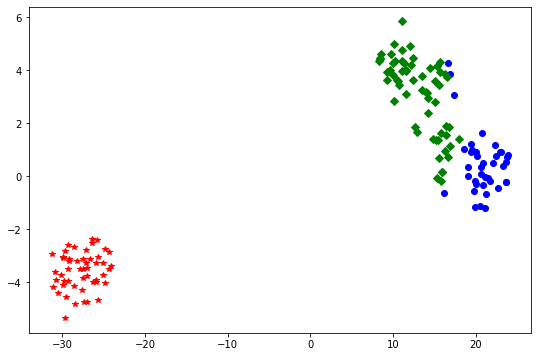

In [50]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
##使用TSNE进行数据降维,降成两维
tsne = TSNE(n_components=2,init='random',
    random_state=177).fit(iris_data)
df=pd.DataFrame(tsne.embedding_) ##将原始数据转换为DataFrame
df['labels'] = kmeans.labels_ ##将聚类结果存储进df数据表
##提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1] 
df3 = df[df['labels']==2] 
## 绘制图形
fig = plt.figure(figsize=(9,6)) ##设定空白画布，并制定大小
##用不同的颜色表示不同数据
plt.plot(df1[0],df1[1],'bo',df2[0],df2[1],'r*',
    df3[0],df3[1],'gD')
plt.savefig('../tmp/聚类结果.png') 
plt.show() ##显示图片

## 6.2.2 评价聚类模型
聚类评价的标准是组内的对象相互之间是相似的（相关的），而不同组中的对象是不同的（不相关的）。即组内的相似性越大，组间差别越大，聚类效果就越好。sklearn的metrics模块提供的聚类模型评价指标。


### 代码6-12 使用FMI评价法评价K-Means聚类模型

In [51]:
%%html
<img style="float: left;" src="./image/6-12.png" width=700 height=400>

####
上表总共列出了6种评价的方法，其中前4种方法均需要真实值的配合才能够评价聚类算法的优劣，后2种则不需要真实值的配合。但是前4种方法评价的效果更具有说服力，并且在实际运行的过程中在有真实值做参考的情况下，聚类方法的评价可以等同于分类算法的评价。
####
除了轮廓系数以外的评价方法，在不考虑业务场景的情况下都是得分越高，其效果越好，最高分值均为1。而轮廓系数则需要判断不同类别数目的情况下其轮廓系数的走势，寻找最优的聚类数目。
####
在具备真实值作为参考的情况下，几种方法均可以很好地评估聚类模型。在没有真实值作为参考的时候，轮廓系数评价方法和Calinski-Harabasz指数评价方法可以结合使用。


In [62]:
from sklearn.metrics import fowlkes_mallows_score
for i in range(2,7):
    # 构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score =fowlkes_mallows_score(iris_target,kmeans.labels_)
    print('iris数据聚%d类FMI评价分值为:%f' %(i,score))

iris数据聚2类FMI评价分值为:0.750473
iris数据聚3类FMI评价分值为:0.820808
iris数据聚4类FMI评价分值为:0.756593
iris数据聚5类FMI评价分值为:0.725483
iris数据聚6类FMI评价分值为:0.614345


结果显示,iris数据聚3类的时候FMI评价法分值最高,故聚类为3类的时候K-Means聚类模型最好

### 代码 6-13 使用轮廓系数评价 K-Means聚类模型
使用轮廓系数评价法评估K-Means模型,然后做出轮廓系数走势图,根据图形判断聚类效果,如代码6-13所示
#### 
从代码6-13 中的图形可以看出,聚类数目为2,3和5,6时平均畸变程度最大
由于iris数本身就是3中鸢尾花的花瓣,花萼长度和宽度的数据,侧面说明了聚类数目为3的时候效果最佳

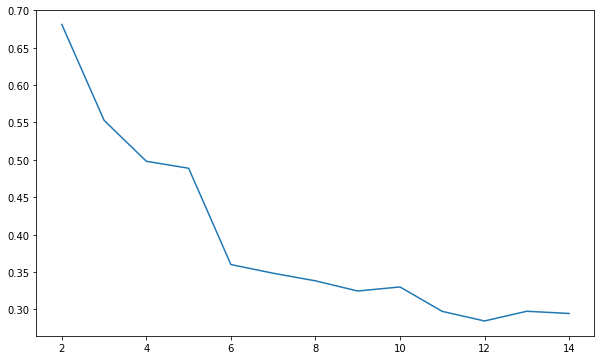

In [71]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettteScore = []
for i in range(2,15):
    #构建并建立模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(iris_data)
    score = silhouette_score(iris_data,kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouettteScore,linewidth=1.5,linestyle='-')
plt.show()

### 代码 6-14 使用Canlinski-Harabasz指数评价K-Means聚类模型
使用Canlinski-Harabasz指数评价K-Means聚类模型,其基本判定方法和前4中需要真实值作为依据的方法相同,分值越高,聚类效果越好,如代码6-14所示

In [75]:
from sklearn.metrics import calinski_harabaz_score
for i in range(2,7):
    #构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(iris_data)
    score=  calinski_harabaz_score(iris_data,kmeans.labels_)
    print('iris数据聚%d类calinski_harabaz指数为：%f'%(i,score))

iris数据聚2类calinski_harabaz指数为：513.924546
iris数据聚3类calinski_harabaz指数为：561.627757
iris数据聚4类calinski_harabaz指数为：530.765808
iris数据聚5类calinski_harabaz指数为：495.541488
iris数据聚6类calinski_harabaz指数为：469.836633


D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is de

代码6-14 显示 ,Calinski-Harabasz指数评价K-Means聚类模型的时候,聚类数目为3的时候得分最高,使用可以认为iris数据聚类为3类的时候效果最优

### 总结
综上以上聚类评价方法,在真实值作为参考的情况下,集中方法均可以很好地评估聚类模型.在没有真实值作为参考的时候,轮廓系数评价法和Calinski-Harabasz

## 6.2.3 任务实现
Seeds数据集存放了不同品种小麦种子的区域,周长,压实度,籽粒长度,籽粒宽度,不对称系数,籽粒腹沟长度以及类别数据,该数据及总共210条记录,7个特征,一个标签,标签分3累.

### 1. 构建K-Means聚类模型
对Seeds 构建K-Means聚类模型,如代码6-15所示
### 代码 6-15 对Seeds构建K-Means聚类模型

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
seeds = pd.read_csv('../data/seeds_dataset.txt',sep='\t')
print('数据集形状为:',seeds.shape)
#处理数据
seeds_data = seeds.iloc[:,:7].values
seeds_target = seeds.iloc[:,:7].values
seeds_names = seeds.columns[:7] 
stdScale = StandardScaler().fit(seeds_data)  # 训练规则
seeds_dataScale = stdScale.transform(seeds_data)  
##构建并训练模型
kmeans = KMeans(n_clusters = 3,random_state=42).fit(seeds_data)
print('构建的KMeans模型为: \n',kmeans)

数据集形状为: (210, 8)
构建的KMeans模型为: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


### 2. 评价构建的K-Means聚类模型
### 6-16 评价使用Seeds数据集构建的K-Means聚类模型

In [87]:
from sklearn.metrics import calinski_harabaz_score
for i in range(2,7):
    ## 构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=12).fit(seeds_data)
    score = calinski_harabaz_score(seeds_data,kmeans.labels_)
    print('seeds数据聚%d类calinski_harabaz指数为：%f'%(i,score))

D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is de

seeds数据聚2类calinski_harabaz指数为：351.179992
seeds数据聚3类calinski_harabaz指数为：375.804961
seeds数据聚4类calinski_harabaz指数为：327.439099
seeds数据聚5类calinski_harabaz指数为：309.769975
seeds数据聚6类calinski_harabaz指数为：302.393627


D:\Study\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
